In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Set styles
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/netflix1.csv')
print("Initial shape:", df.shape)
print(df.head(3))

Initial shape: (8790, 10)
  show_id     type                 title         director        country  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
1      s3  TV Show             Ganglands  Julien Leclercq         France   
2      s6  TV Show         Midnight Mass    Mike Flanagan  United States   

  date_added  release_year rating  duration  \
0  9/25/2021          2020  PG-13    90 min   
1  9/24/2021          2021  TV-MA  1 Season   
2  9/24/2021          2021  TV-MA  1 Season   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  


In [4]:
# Step 3: Cleaning the Data

# Remove duplicates
df = df.drop_duplicates()

# Fill missing director/cast/country with 'Unknown'
df[['director', 'country']] = df[['director', 'country']].fillna('Unknown')

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Split duration into two parts: number + unit (min/season)
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('Unknown')

# Clean nulls in important fields with placeholders or drop if critical
df = df.dropna(subset=['title', 'date_added'])

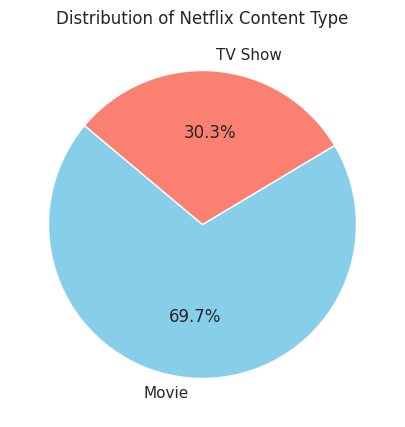

In [5]:
# Step 4: Exploratory Data Analysis (EDA)

# A. Content Type (Movies vs TV Shows)
type_data = df['type'].value_counts()
type_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Netflix Content Type')
plt.ylabel('')
plt.show()

/tmp/ipython-input-6-3043036614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Spectral')


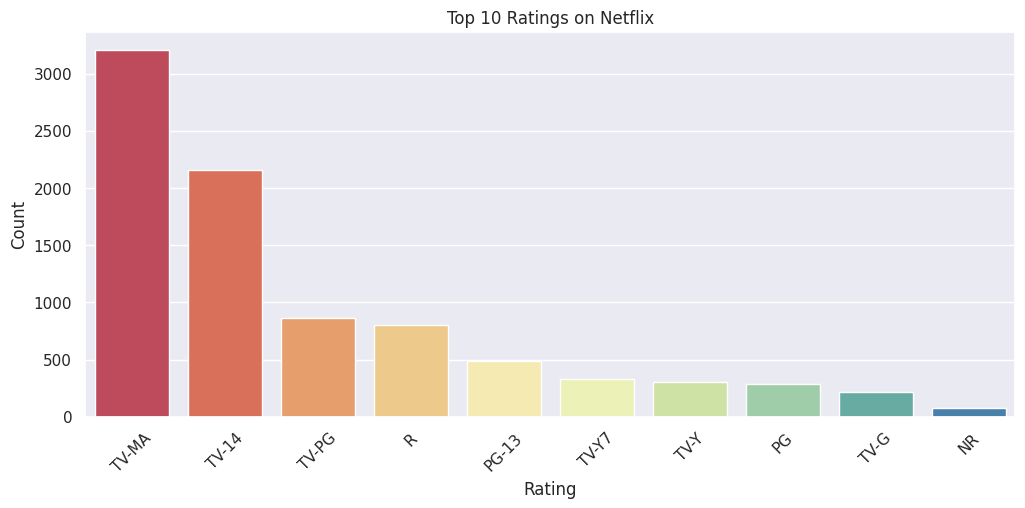

In [6]:
# B. Rating Frequency
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Spectral')
plt.title('Top 10 Ratings on Netflix')
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

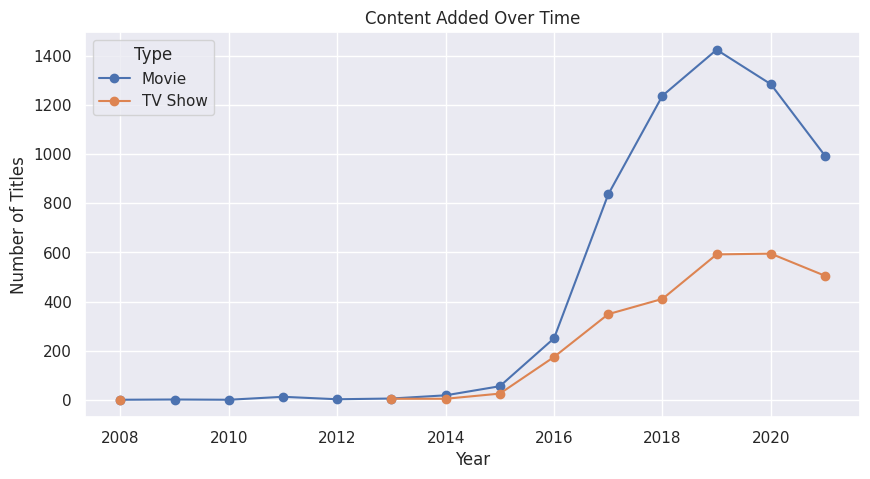

In [7]:
# C. Content Over Time
df['year_added'] = df['date_added'].dt.year
df_yearly = df.groupby(['year_added', 'type']).size().unstack()
df_yearly.plot(marker='o')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Type')
plt.show()

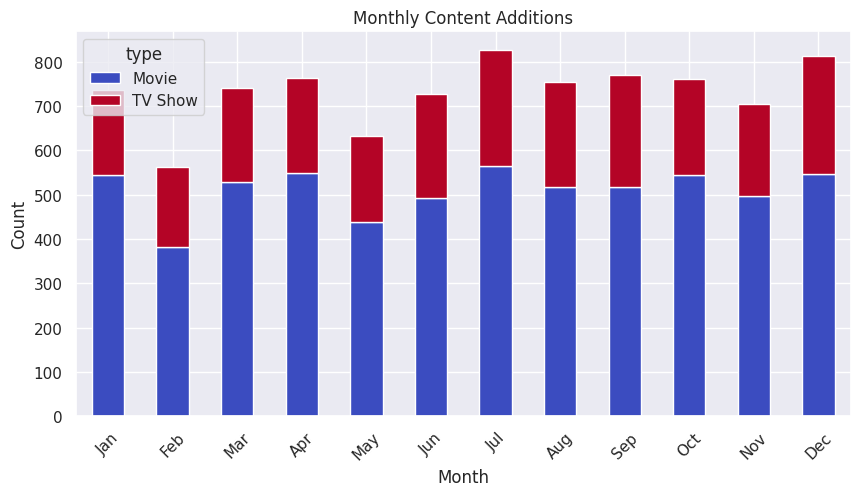

In [8]:
# D. Monthly Trends
df['month'] = df['date_added'].dt.month
monthly_data = df.groupby(['month', 'type']).size().unstack()
monthly_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Monthly Content Additions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

/tmp/ipython-input-9-2721850440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


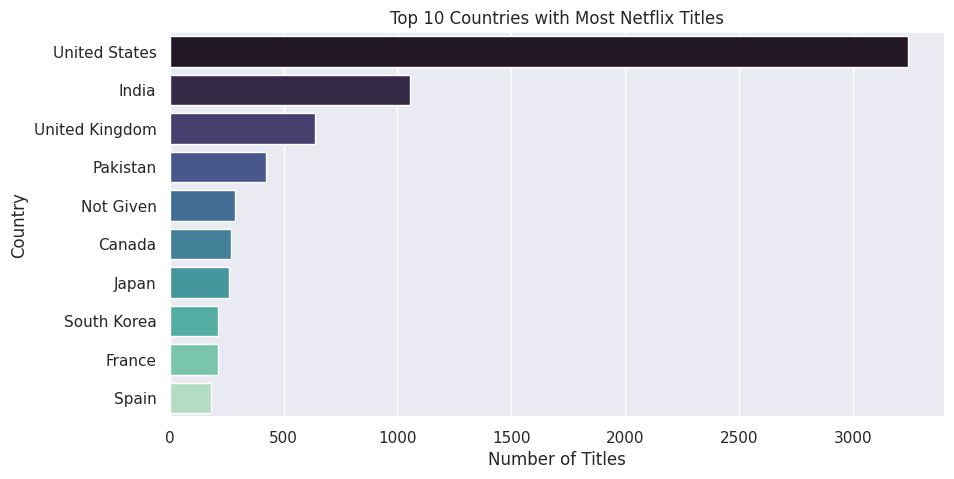

In [9]:
# E. Top Countries
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

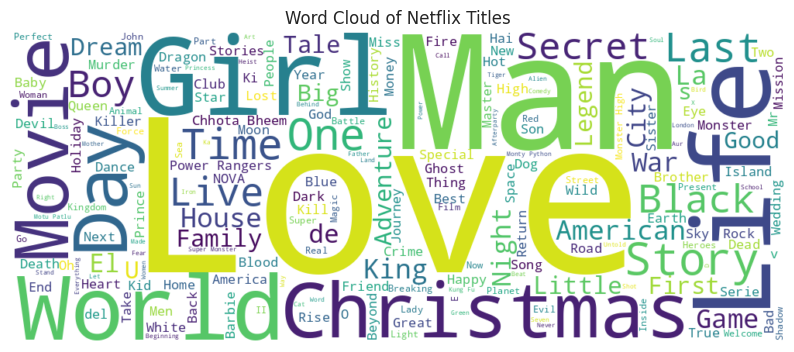

In [10]:
# F. Word Cloud of Movie Titles
titles_text = ' '.join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(titles_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

/tmp/ipython-input-11-4201442287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, y='Genre', x='Count', palette='viridis')


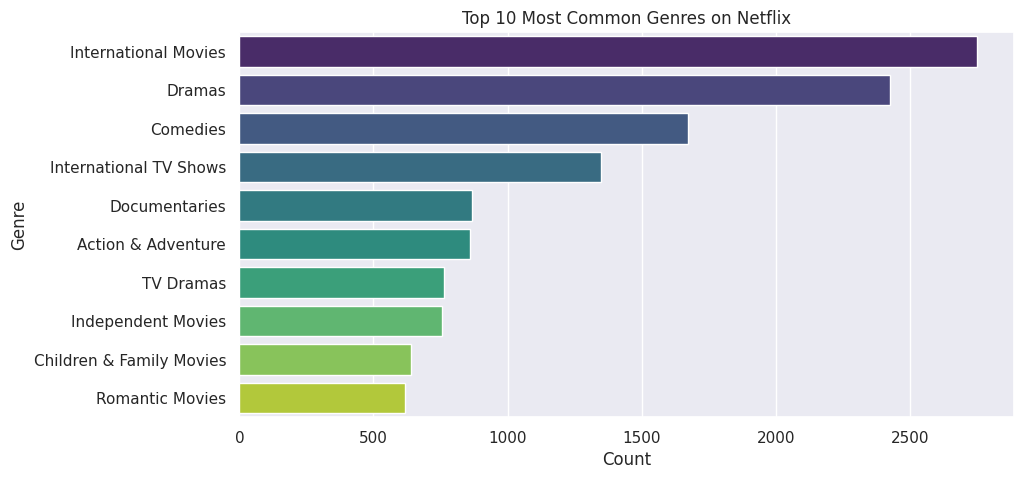

In [11]:
# G. Most Common Genres (Flattened List)
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
common_genres = Counter(flat_genres).most_common(10)

# Bar Plot for Genres
genres_df = pd.DataFrame(common_genres, columns=['Genre', 'Count'])
sns.barplot(data=genres_df, y='Genre', x='Count', palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()

/tmp/ipython-input-12-3609895076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


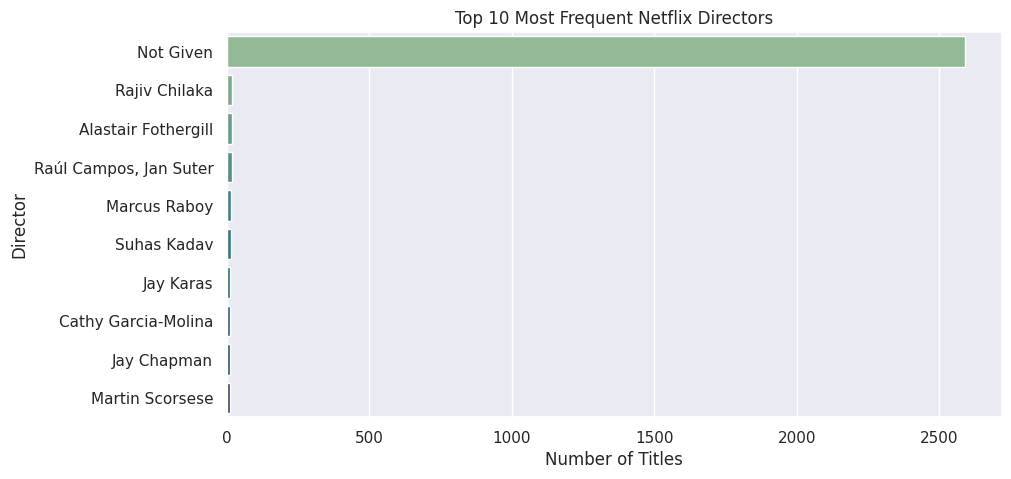

In [12]:
# H. Top 10 Most Frequent Directors (Excluding 'Unknown')
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title("Top 10 Most Frequent Netflix Directors")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()